In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('GDPlist.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                125 non-null    object
 1   Continent              125 non-null    object
 2   GDP (millions of US$)  125 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


,Country,Continent,GDP (millions of US$)
0,�Afghanistan,Asia,18181
1,�Albania,Europe,12847
2,�Algeria,Africa,190709
3,�Angola,Africa,100948
4,�Argentina,South America,447644


- Đọc bộ dữ liệu, cho biết số dòng, số cột và kiểu dữ liệu của các thuộc tính.
- Tính giá trị lớn nhất và nhỏ nhất của GDP.
- Hãy cho biết xu hướng phân bố dữ liệu của GDP.
- Hãy cho biết châu lục nào xuất hiện nhiều nhất?
- Với mỗi châu lục hãy tính tổng GDP; trung bình cộng GDP. Hợp nhất 2 bảng này thành một bảng duy nhất gồm 3 thông tin: Tên châu lục; Tổng GDP; TBC GDP.

In [3]:
for i in range(df.shape[0]):
    df.replace(df.loc[i, 'Country'], df.loc[i, 'Country'][1:], inplace=True)

df.head()

,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644


In [4]:
df_gdp = df.loc[:, 'GDP (millions of US$)']
print(f'Min GDP is {df_gdp.min()}')
print(f'Max GDP is {df_gdp.max()}')

Min GDP is 10600
Max GDP is 15094025


In [5]:
mean_gdp = df_gdp.mean()  #Average vallue of GPD
mode_gdp = df_gdp.mode()  #The most appear vallue in dataframe
median_gdp = df_gdp.median()   #Where vallue of dataframe split into 2 equal set

gdp_3m = [mean_gdp, mode_gdp, median_gdp]

if len(mode_gdp) == 1:
    if max(gdp_3m) == mode_gdp:
        print('The data has a LEFT skewed distribution')
    elif min(gdp_3m) == mode_gdp:
        print('The data has a RIGHT skewed distribution')
    else:
        print('The data is symmetric (normally distributed)')
else:
    if mean_gdp > median_gdp:
        print('The data has a RIGHT skewed distribution')
    else:
        print('The data has a LEFT skewed distribution')


The data has a RIGHT skewed distribution


In [6]:
print(len(mode_gdp))

125


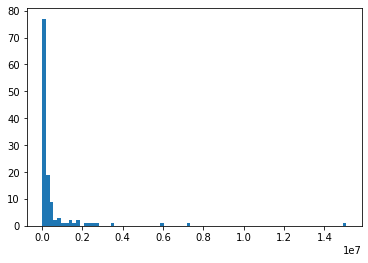

In [7]:
plt.hist(x = df['GDP (millions of US$)'], bins=80);

In [8]:
df_continent = df['Continent']
most_continent = df_continent.mode()
print(most_continent[0])

Europe


In [9]:
gdp_by_continent = df.groupby('Continent')['GDP (millions of US$)'].count()

gdp_by_continent_sum = df.groupby('Continent')['GDP (millions of US$)'].sum()

gdp_by_continent_mean = df.groupby('Continent')['GDP (millions of US$)'].mean()


new_df = pd.merge(gdp_by_continent, gdp_by_continent_sum, on='Continent')
final_df = pd.merge(new_df, gdp_by_continent_mean, on='Continent')
final_df.rename(columns={'GDP (millions of US$)_x': 'Countries', 'GDP (millions of US$)_y': 'Total GDP', 'GDP (millions of US$)': 'Mean GDP'})

,Countries,Total GDP,Mean GDP
Continent,,,
Africa,29,1820811,6.278659e+04
Asia,36,24425891,6.784970e+05
Europe,37,19139380,5.172805e+05
North America,11,18238447,1.658041e+06
Oceania,3,1662727,5.542423e+05
South America,9,4141217,4.601352e+05
